In [1]:
import pygraphviz as pgv

from IPython.display import Image

from transition_graph import TransitionGraph

In [2]:
def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

In [13]:
# tg = TransitionGraph.from_transition_table(['a', 'b'], {
#         'q0': [None, None, ['q1', 'q2']],
#         'q1': ['q3', None],
#         'q2': ['q4', None],
#         'q3': [None, 'q1'],
#         'q4': [None, 'q5'],
#         'q5': ['q2', None]
#     }, start_node='q0', finish_nodes=['q1', 'q2'])

# tg = TransitionGraph.from_transition_table(['a', 'b'], {
#         'q1': ['q2', 'q3'],
#         'q2': ['q1', None, 'q3'],
#         'q3': [None, ['q3', 'q4']],
#         'q4': [['q3', 'q2'], None],
#     }, start_node='q1', finish_nodes=['q3', 'q4'])

tg = TransitionGraph.from_transition_table(['a', 'b'], {
        'q1': ['q1', 'q2'],
        'q2': ['q3', 'q2'],
        'q3': ['q1', 'q2'],
    }, start_node='q1', finish_nodes=['q1'])

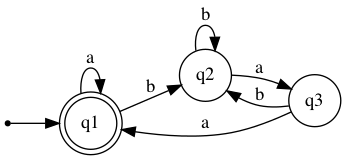

In [14]:
draw(tg.to_dot_diagram())

removed self edge q2-(b)->q2
q1-(b)->q2 q2-(a)->q3 b((b)*)a
q3-(b)->q2 q2-(a)->q3 b((b)*)a
removed state q2


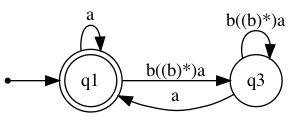

In [15]:
tg1 = tg.clone()
print(tg1.eliminate_state())
draw(tg1.to_dot_diagram())

removed self edge q3-(b((b)*)a)->q3
q1-(b((b)*)a)->q3 q3-(a)->q1 (b((b)*)a)((b((b)*)a)*)a
removed state q3


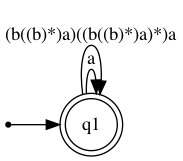

In [16]:
print(tg1.eliminate_state())
draw(tg1.to_dot_diagram())

Joined common edges


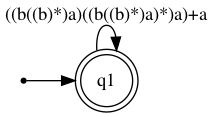

In [17]:
print(tg1.eliminate_state())
draw(tg1.to_dot_diagram())

None


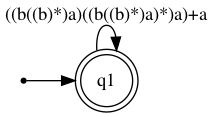

In [18]:
print(tg1.eliminate_state())
draw(tg1.to_dot_diagram())